## Very Quick Roadmap to
# Asynchronous Advantage Actor Critic (A3C)

![input-to-nn-channel-combined](./img/snaps-0-1-2-3.gif)

## Aproximación de Functiones (*Function Approximation*)

Hasta ahora hemos visto distintas maneras de encontrar soluciones a **Procesos de Decisión Markovianos** (***MDPs***) del tipo:

<img src="./img/agent-env-diagram.png" align="center" width="500">

Para ello, un agente puede aprender y/o hacer uso de
- una ***Value Function*** / Función de valor
- una ***Policy Function*** / Política de comportamiento
- o un ***Modelo*** del Environment / Donde *modelo* será conocer las ***transiciones*** del environment (o un estimado de las mismas)

Estas funciones, son esencialmente un *mapeo* (*mapping*) que **reducen la dimensionalidad** del problema: 

---

> desde $\big[$ `observación` $\big]$ $\mapsto$ $\big[$ `representación con "mayor nivel de abstracción"` $\big]$
   
---
#### Particularmente:

- Value Function:

> desde $\big[$ `estados o pares estado-acción` $\big]$ $\mapsto$ $\big[$ `algún valor / puntaje` $\big]$
---
- Policy Function:

> desde $\big[$ `estados` $\big]$ $\mapsto$ $\big[$ `acciones` $\big]$
>
> desde $\big[$ `states` $\big]$ $\mapsto$ $\big[$ `actions` $\big]$

---
- Modelo: 

> desde $\big[$ `estado` $\big]$ $\mapsto$ $\big[$ `siguiente observación o esperanza de` $\big]$

---
Queremos aprender estas funciones **directamente desde la experiencia**.

----------

### Value Function

Una opción intuitiva sería usar **Funciones de Valor**, ya que son fáciles de interpretar y de decidir una política a partir de ellas, además de disponer de una teoría más extensa que soporte sus prácticas.

### Tabular

Los algoritmos más simples, se basan en **soluciones tabulares**, que buscan llevar un **historial** de los estados visitados hasta el momento.

El problema con ésto es que la cantidad de estados posible es gigantesca a pesar de estar resolviendo problemas simples.

![pacman-micro-layout](./img/pacman-micro.png)

#### Curse of dimensionality

Consideremos un mapa (*layout*) de *pac-man* de 5x5 celdas como el de arriba.

![pacman-micro-grid](./img/pacman-micro-grid.png)

Si contamos las diferentes formas de organizar **solo** las bolitas (*pellets*), existen $2^{25}$ (más de *33 millones*) posibles combinaciones, que para modelos tabulares serán **estados completamente diferentes** uno de otro.

##### Simulación

Llevadolo a la práctica, usando el algoritmo ***Q Learning*** para resolver una versión aún más simple de este mapa (con solo 2 pellets) se necesitan alrededor de **2000 episodios** para aprender a ganar casi con seguridad, pero la cantidad de estados (*states*) guardados en la Q function supera los **8000 elementos** (*<state: value>*), con una fuerte tendencia a seguir aumentando, mientras que el reward promedio se mantiene casi constante:

Entrenado por 2000 episodios (juegos):
![pacman-2000-ep-plot](./img/q-table-2000-ep.png "2000 episodes") 

Luego de 10 mil episodios:

![pacman-10000-ep-plot](./img/q-table-10000-ep.png  "10000 episodes")

Las siguientes celdas permiten **reproducir los resultados** de arriba al entrenar un agente con *Q learning* por 2000 episodios, y mostrar 3 juegos siguiendo una política *greedy* con respecto a la Value Function aproximada:

In [1]:
# Change directory to run pac-man simulator python files
# Assumes notebook on main directory
import os
ORIGINAL_DIR = None
if not ORIGINAL_DIR:
    ORIGINAL_DIR = os.getcwd()
try:
    cs188x_pacman_dir = './cs188x_pacman'
    os.chdir(cs188x_pacman_dir)
    original_dir = os.getcwd()[:2-len(cs188x_pacman_dir)]
    print("Original directory:\n",original_dir)
    print("Moved to:\n", os.getcwd())
except:
    print("Couldn't change to ./cs188x_pacman folder. Are you already there?")
    print("Current directory:", os.getcwd())

Original directory:
 /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/
Moved to:
 /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/cs188x_pacman


In [2]:
import util
import game
import pacman

from pacman import readCommand, runGames

Beginning 2000 episodes of Training
Episodes	Mean R lifetime / last 50 ep	Training time
  50/2000	r: -510.30 / -510.30	0.33 sec
 100/2000	r: -501.08 / -491.86	0.45 sec
 150/2000	r: -504.41 / -511.08	0.57 sec
 200/2000	r: -506.61 / -513.18	0.62 sec
 250/2000	r: -495.34 / -450.28	0.65 sec
 300/2000	r: -450.89 / -228.64	0.61 sec
 350/2000	r: -439.30 / -369.74	0.61 sec
 400/2000	r: -428.12 / -349.84	0.67 sec
 450/2000	r: -417.38 / -331.52	0.65 sec
 500/2000	r: -402.79 / -271.44	0.68 sec
 550/2000	r: -390.78 / -270.70	0.75 sec
 600/2000	r: -381.02 / -273.70	0.99 sec
 650/2000	r: -366.42 / -191.20	0.88 sec
 700/2000	r: -349.65 / -131.56	1.01 sec
 750/2000	r: -332.43 / -91.44	0.84 sec
 800/2000	r: -316.19 / -72.48	0.85 sec
 850/2000	r: -300.57 / -50.76	0.83 sec
 900/2000	r: -283.35 / 9.36	0.83 sec
 950/2000	r: -270.14 / -32.22	0.87 sec
1000/2000	r: -250.13 / 129.90	0.85 sec
1050/2000	r: -237.86 / 7.70	0.87 sec
1100/2000	r: -230.34 / -72.40	0.96 sec
1150/2000	r: -217.39 / 67.50	0.96 sec
1200/2

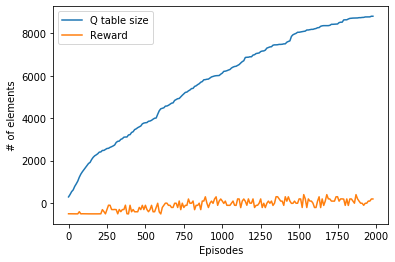

Final Q size (table): 8803 different states saved

Pacman emerges victorious! Score: 495
Pacman died! Score: -516
Pacman emerges victorious! Score: 499
Average Score: 159.33333333333334
Scores:        495.0, -516.0, 499.0
Win Rate:      2/3 (0.67)
Record:        Win, Loss, Win


In [3]:
%matplotlib inline
prefs = ['--pacman',     'PacmanQAgent',
         '--numTraining','2000',
         '--numGames',   '2003',
         '--layout',     'smallGrid']

args = readCommand(prefs)
runGames(**args)

##### Only Test

El siguiente código simula 3 juegos con un agente **previamente entrenado** por 2000 episodios (solo *Testing*)

El fantasma es estocástico, por lo que **cada juego será diferente**, por más que el agente mantenga en memoria siempre los mismos pares <estado, acción>

In [5]:
%%capture
# ^ Comment this line to get a verbose output
prefs = ['--pacman',     'PacmanQAgent',
         '--numTraining','0',
         '--numGames',   '3',
         '--layout',     'smallGrid',
         '--replay',     'recorded/recorded-game-pacman-q-agent-2000th-game']
args = readCommand(prefs)  # Get game components based on prefs
runGames(**args)

##### Extra commands

[qLearningAgents.py](./cs188x_pacman/qlearningAgents.py) contiene la implementación de los distintos agentes.

In [11]:
# To record EVERY game, add: , ['--recordActions', 'True']
#prefs = ['--pacman',        'PacmanQAgent',
#         '--numTraining',   '2000',
#         '--numGames',      '2003',
#         '--layout',        'smallGrid',
#         '--recordActions', 'True']

In [6]:
# To print all options use '--help'
#args = pacman.readCommand(['--help']) # or uncomment this line

### Aproximación de Función de Valor

Vemos que hay varios problemas de modelos tabulares para grandes MDPs: 

- Necesitamos **enormes cantidades de memoria** para guardar cada estado posible
- Aprender un valor **para cada** estado requiere de **mucho tiempo**
- Generalmente los estados son **parcialmente observables**

Queda claro que para resolver problemas con **grandes espacios** de estado (discreto, continuos e *infinitos*), será necesario **aproximar la Función de Valor**, y no depender de recordar cada observación.

Para estados similares, esperamos obtener resultados similares.

Si el espacio de estados es muy grande o contínuo, sólo veremos cada estado una única vez, por lo que sólo recordarlos no nos ayudará a predecir algún otro parecido.
___

Siendo concretos, en el ejemplo de Pac-man

* Si en el pasado obtuvimos un ***reward negativo*** por estar al lado de un fantasma en la esquina superior del mapa
  
  queremos que si encuentra un estado *"parecido"* lo considere peligroso (**generalice**)

![pacman-danger-similar-states](./img/pacman-micro-danger1.png  "Similar states")

$$\text{Dos estados completamente diferentes para modelos tabulares}$$

$$\text{Diferencia: pellet desplazado dos celdas a la derecha}$$

---

Existen distintos tipos de aproximadores de funciones que podemos usar, como:

* **Aproximador lineal** (si conocemos *buenas features*)
* **Red Neuronal**
* Decision tree
* Neirest Neighbour (no paramétrico)
* Constructores de features
  * Fourier / wavelets bases
  * Coarse coding

Pero necesitamos considerar propiedades particulares de Reinforcement Learning:
* La **experiencia no es iid** (steps consecutivos están altamente correlacionados)
* La **política** del agente afecta **directamente la data** que recibe
* Las Funciones de Valor pueden ser **no-estacionarias** (como al usar *bootstraping*)
* El feedback **no** suele ser instantáneo (*delayed feedback*)

### Aproximador Lineal

Es la más simple de las opciones de arriba, pero tiene **el mayor peso teórico** que la respalda, lo que la vuelve una excelente opción para una gran variedad de casos.

Se basa en reducir el espacio de estados a una serie de *features* que lo representan, y usar como **Función de Valor aproximada**, a una combinación lineal de estas *features* con un cierto peso $w_i$ (*weights*) que se necesita aprender.

$n $ : número de *features*

$f_i(s,a)$ : función que devuelve un valor correspondiente a una feature $i$ dado estado $s$ y acción $a$

$$\tilde{Q}(s,a) = \sum\limits_{i=1}^n f_i(s,a) * w_i$$

Parte de la simpleza de esta herramienta, surge de que al derivar nuestra función Q aproximada con respecto a los pesos, obtenemos una sumatoria de **solo los valores de las *features***, lo que facilita actualizar nuestras estimaciones de los distintos pesos:

**Error de predicción** (o *advantage function*):

$advantage = (R + \gamma \max\limits_{a} \tilde{Q}(S', a)) - \tilde{Q}(S,A)$

**Update:**

$w_i \leftarrow w_i + \alpha \cdot advantage \cdot f_i(S,A)$


Volviendo a nuestro simulador de Pacman, podemos resolver desafíos con un **espacio mucho mayor**, en una **menor cantidad de episodios y espacio en memoria** (aunque **mayor cantidad de tiempo** de aprendizaje), usando un aproximador lineal con features como:

1. Fantasma en celda contigua (1 ó 0)
2. Comer *pellet* (1 ó 0)
3. Distancia a comida más cercana (float)

ver archivo [./cs188x_pacman/featureExtractors.py](./cs188x_pacman/featureExtractors.py)

##### Train agent

El siguiente código entrena por 100 partidas un aproximador lineal con las features mencionadas en un mapa mucho mayor: 

In [3]:
from pacman import readCommand, runGames
prefs = ['--pacman',     'ApproximateQAgent',
         '--numTraining','100',
         '--numGames',   '101',
         '--layout',     'mediumClassic',
         '--agentArgs',  'extractor=SimpleExtractor']
args = readCommand(prefs)  # Get game components based on prefs
runGames(**args)

Beginning 100 episodes of Training
Episodes	Mean R lifetime / last 50 ep	Training time
  50/ 100	r: 1049.46 / 1049.46	9.75 sec
 100/ 100	r: 1065.04 / 1080.62	9.13 sec
Training Done (turning off epsilon and alpha)
---------------------------------------------
Pacman emerges victorious! Score: 1332
Average Score: 1332.0
Scores:        1332.0
Win Rate:      1/1 (1.00)
Record:        Win


##### Test agent

A continuación, se facilita (solo como visualización) un agente con aproximador lineal **ya entrenado** por 100 episodios:

In [9]:
%%capture
# ^ Comment this line to get a verbose output
prefs = ['--pacman',     'ApproximateQAgent',
         '--numTraining','0',
         '--numGames',   '1',
         '--layout',     'mediumClassic',
         '--agentArgs',  'extractor=SimpleExtractor',
         '--replay',     'recorded/recorded-game-pacman-approx-linear-q-agent-100th-game']
args = readCommand(prefs)  # Get game components based on options
runGames(**args)

Uno de los problemas con usar aproximadores lineales, es que necesitamos ***buenas* features** para obtener resultados agradables, donde "*buenas*" dependerá de cada caso particular.

En el ejemplo de arriba, "*Fantasma en celda contigua*" aumenta en gran medida la performance del algoritmo, lo que intuitivamente es de esperar, ya que estamos casi **prefijando** el comportamiento de pacman para este problema en particular.

Y aún consiguiendo estas features, vienen con la limitación de que en un aproximador lineal, no podrán ser "relacionadas" entre sí, por lo que debemos incluirlas como productos o algún otro tipo de polinomio, dejando de ser lineal (y con ello desaparecerán ciertas garantías).

### Funciones Diferenciables no-Lineales: *Redes Neuronales*

Una solución más general a este tipo de problemas es usar Redes Neuronales (NNs) **como aproximador** de nuestra Función de Valor.

De esta forma, ya no necesitamos transformar nuestro espacio de estados, ni conocer cómo funciona el problema, sino que podemos usar **directamente** los datos *crudos* observados (ej: píxeles) como entrada, y obtener como salida de la NN el valor que lo represente.

Concretamente, la **Función de Valor serán los pesos (*weights*) de la red neuronal**, que *mapearán* directamente desde una entrada cruda, a algún valor o puntaje que represente ese estado.

Las features estarán **implícitas en los pesos** de la red, dejando en manos del **optimizador** de la red neuronal el problema de encontrar buenas features, generalizando a una mayor cantidad de casos, sin necesidad de tener que conocer la naturaleza del problema.

---

Es conveniente comenzar a pensar en este tipo de diseño de algoritmos de una manera ***más modular***, donde cada módulo puede ser reemplazado por uno equivalente, o que generalice a varios de ellos.

En el caso de Q Learning con aproximador lineal, solo basta con reemplazar "el módulo" encargado de transformar el espacio mediante las features preprogramadas, por una red neuronal, como se muestra a continuación.

##### Pseudocodigo para one step Q-learning con NN 
(usando funciones de [PyTorch](https://pytorch.org/), como se usará en el resto del TP)

>    `Usando NN, calcular Q values para estado observado`
>
>    `Q(S_t, a) para cada acción a`
>
>    q = q_net( obs )
>    
>    `Seleccionar acción de forma epsilon-greedy `
>
>    action = epsilon_greedy( q )
>    
>    `Obtenemos el valor de esta acción`
>
>    qa = q [ action ] 
>    
>    `Realizamos la acción elegida y obtenemos nueva obs`
>
>    reward, discount, next_obs = env.step( action )
>    
>    `Usamos NN nuevamente para estimar max valor de prox accion`
>
>    max_q_next = torch.max( q_net( next_obs ) )
>    
>    `Calculamos TD-error, con especial atención a NO propagar`
>
>    `gradiente de next_obs, solo de qa`
>
>    advantage = reward + discount * max_q_next.detach() - qa
>    
>    `Definimos loss`
>
>    `(ver archivo con deducción de por qué norma L2)`
>
>    q_loss = delta**2 / 2
>    
>    `Usamos optimizador con respecto a este q_loss`
>
>    `con Stochastic Gradient Descent, RMSProp, Adam, etc`
>
>    optimizer.minimize( q_loss )

Deducción de por qué normal L2: [./resources/sarsa_updates_are_MSE.ipynb](./resources/sarsa_updates_are_MSE.ipynb)

A continuación, *a vanilla implementation* del pseudocódigo de arriba, aunque con pocas garantías de converger, ya que para este simulador particular de Pacman, las observaciones son **caracteres ascii** y no píxeles o algún valor numérico, por lo que hubo que hacer bastante procesamiento de datos, que pudo no haber sido la mejor manera.

Se exploraron varias opciones en esta dirección, en especial, para cada caracter ascii diferente observado (10 en total):
* un número entre 0 y 1 (0/10, 1/10, 2/10, ... , 9/10)
* un one-hot vector de 10 dimensiones
* una fusión de las anteriores, aprovechando el triple canal de entrada de colores de la red neuronal convolucional, dividiendo en cada canal:
 
 Canal 1: enemigos / agentes
 
 Canal 2: objetos interactivos / pellets
 
 Canal 3: objetos inertes / muros y límites del mapa

A pesar de que conceptualmente parecen ideas sólidas (sobre todo las últimas dos que agregan cierta abstracción/conocimiento previo a la representación del problema), el algoritmo parece no converger, o lo hace muy lentamente.

Dada la **amplia** variedad de factores que pueden ser la causa de ésto (hiperparámetros, representación pobre, errores de programación y manejo del modelo, modelo de NN demasiado grande o poco apto, etc) y las no-tan-claras capacidades de convergencia de este tipo de modelo no-lineal, se decidió por avanzar en los temas del trabajo práctico, dejando este algoritmo sin una solución/implementación satisfactoria.

Para ver el código del agente '*NNQAgentAllQActionsOut*':
[./ cs188x_pacman / qLearningAgents.py](./cs188x_pacman/qLearningAgents.py)

In [4]:
# Change dir to run python files in subdirectory
import os
try:
    os.chdir('./cs188x_pacman')
except:
    print("Couldn't change to ./cs188x_pacman folder. Are you already there?")
    print("Current directory:", os.getcwd())

from pacman import readCommand, runGames

Couldn't change to ./cs188x_pacman folder. Are you already there?
Current directory: /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/cs188x_pacman


In [2]:
# NN Agent-pNNQAgent
#options = ["-pNNQAgentAllQActionsOut", "-x500", "-n510", "-k2", "-gDirectionalGhost","-lsmallGridMoreFood"]
prefs = ['--pacman',     'NNQAgentAllQActionsOut',
         '--numTraining','500',
         '--numGames',   '501',
         '--numghosts',  '2',
         '--ghosts',     'DirectionalGhost',
         '--layout',     'smallGridMoreFood']
args = readCommand(prefs)  # Get game components based on options
runGames(**args)

Beginning 500 episodes of Training
Episodes	Mean R lifetime / last 50 ep	Training time
['West', 'Stop', 'East']
tensor([0.2000, 0.1999, 0.2000, 0.2000, 0.2000])
['Stop', 'East', 'South']
tensor([0.2000, 0.1999, 0.2000, 0.2000, 0.2000])


AttributeError: 'NNQAgentAllQActionsOut' object has no attribute 'Q'

### Extensiones

El tipo de dificultades anterior no es ajeno al área de Deep Reinforcement Learning en general, por lo que existen varios métodos o *trucos* para mejorar las capacidades de este tipo de algoritmos. Entre ellos:

#### DQN con Atari
Paper: [Playing Atari with Deep Reinforcement Learning](./resources/Playing_Atari_with_Deep_Reinforcement_Learning_-_DQN.pdf)

* **Replay Buffer (DQN):**

  Reemplaza el aprendizaje online de los anteriores algoritmos, por sampleo de mini-batches de un buffer/historial de transiciones 
  $T_{t=0}, T_{t=1}, T_{t=2}, ... , T_{t=n}$
  
  Siendo $T_{t=i}$: [observación > accion > nueva observación]
  
  Cada sample se suele observar varias veces antes de ser descartado(4-8 en DQN).
  
  Si se *samplea* de manera aleatoria entre los datos guardados, obtendremos una data con **características más iid**.
  
  **OBS: Replay Buffer $\approx$ Modelo**
  
  Tener un *replay buffer* suele ser considerado como una forma de *Modelo* (aproximado), ya que las observaciones fueron *samples* del environment y mantienen su distribución.
  
  Volver a observar datos guardados de este buffer, es equivalente a obtener muestras de un Modelo de tipo *caja negra*, del cual suponemos tiene distribución similar a la del *environment*.

* **Target Network (DQN):**

  Se tiene una segunda NN con **el mismo** modelo (de por ejemplo la Value Function) pero con otros parámetros (típicamente llamados $\theta^{-}$)
  
  Se usa para realizar *bootstraping*, por lo que la idea detrás es que sea **una función más estable o estacionaria** que la Función de Valor con parámetros $\theta$.
  
  Más en la dirección del *Aprendizaje Supervisado*, mientras que con *Replay Buffer* se actualizan los parámetros $\theta$ en cada mini-batch, los parámetros $\theta^{-}$ de la *Target Network* se "actualizan" de manera más esporádica (ej. cada 10.000 time steps).
  
  Esta actualización de los parámetros $\theta^{-}$ es simplemente sobreescribir los $\theta^{-}$ ya existentes con los $\theta$ aprendidos usando *Replay Buffer*, y **mantenerlos fijos** durante el resto de la franja de tiempo, en la cual se usa este red para realizar *bootstraping*.
  
  Cabe destacar que ahora la loss function es función de ambas redes (con $\theta$ y $\theta^-$):
  
  $loss(\theta) = \frac{1}{2} \, (R_{i+1} + \gamma \, [\![ \mathop{max}_{a} q_{\theta^-} (S_{i+1}, a) ]\!] - q_\theta(S_i, A_i))^2 $
  
  Donde los dobles corchetes $[\![ * ]\!]$ indican que **no** debe *fluir* ese gradiente (en caso contrario es llamada *Residual Network*, generalmente con **menor performance**, por no respetar *causalidad*).
  
  Con esta *Target Network* extra se logra (no siempre) mayor estabilidad en el algoritmo, aunque **no queda claro cuándo y en qué tipo de problemas**.
  
  Una observación de [Vlad Mnih](https://www.cs.toronto.edu/~vmnih/) (uno de los autores de DQN) es que ***a medida que la capacidad o "tamaño" del modelo de red neuronal incrementa, la Target Network se vuelve menos importante***.
  
  Una hipótesis (no formal) de por qué esto es así, se basa en que teniendo un **modelo neuronal pequeño**, los updates de cada acción afectarán **gran parte de la red**, volviendo a nuestro objetivo **altamente no-estacionario**.
  
  Mientras que con un modelo neuronal de **mayor capacidad**, cada update afectará a una **pequeña porción de la red**, por lo que el objetivo no cambiará tanto, **ganando estabilidad** y restandole importancia a los beneficios que se puedan ganar al incluir una  Target Network.
  
---

En el caso de DQN con Atari, también fueron usadas otras estrategias como **pre-procesamiento** de los datos de entrada, ***hyper parameter tunning*** corriendo múltiples instancias con un gran poder de hardware para elegir los mejores parámetros, como con el discount factor de 0.99 elegido sobre varios, para tener cierto horizonte sobre el cual optimizar.

Se logró cierta generalidad en el resultado, ya que **una vez hayados estos valores, se fijaron para todos los juegos testeados**, pero al mismo tiempo da una idea de que sigue siendo necesaria (al menos para DQN) cierta *fuerza bruta* que suplante la falta de conocimiento en el tema.

#### Multi-step Return

![n-step-td](./img/n-step-td.jpg)

Otro método que suele ayudar a encontrar un equilibrio entre **bias** y **varianza** para estos modelos, es usar como *Return* $G_t$ algo intermedio entre TD return ($G_t^{(1)}$) y MC return ($G_t^{(\infty)}$): 

##### n-step TD return

Denotaremos con superíndice $^{(n)}$ al return correspondiente a $n$ pasos (acciones por *time-step*) que tomaremos con rewards $R_{t+1}, R_{t+2}, ... ,R_{t+n}$, y una estimación a futuro $\tilde{V}(S_{t+n})$ del último estado  (*bootstrap*), cada uno con sus respectivos descuentos $\gamma^{i-1}$:

$$G_t^{(n)} = R_{t+1} + \gamma\, R_{t+2}\, + \gamma^2\, R_{t+3} + \, ... \, + \, \gamma^{n-1} R_{t+n} + \gamma^{n}\, \tilde{V}(S_{t+n})$$

$$G_t^{(n)} = ( \sum_{i=1}^n \gamma^{i-1}\, R_{t+i} ) + \gamma^n \, \tilde{V}(S_{t+n})$$

Con lo que obtenemos ***n-step Temporal-Difference Learning***

con update:

$\tilde{V}(S_t) \leftarrow \tilde{V}(S_t) + \alpha \, (G_t^{(n)} - \tilde{V}(S_t))$

lo cual nos permite tener un control sobre un rango de acción $n$, que será otro hyperparámetro cuyo valor dependerá de cada problema.

Para obtener una intuición de cómo mejora nuestro algoritmo, consideremos el siguiente ejemplo:

> Con política de ***random walk*** y
> un **único reward** en un extremo del MDP
>    
> buscamos mejorar nuestra **estimación de la Value Function** (el valor de cada estado A-E) usando TD-error con n-step return:

Considerar para 19 estados (A a S), por simplicidad solo se muestran 5  (A a E):
![n-step-td-random-walk-silver-example](./img/n-step-td-random-walk-silver-example.png)


![n-step-td-random-walk-hado-example](./img/n-step-td-random-walk-hado-example.png)

En el eje vertical tenemos el **error de predicción**

En el eje horizontal **step size** (o *learning rate*) $\alpha$

Podemos ver cómo con $G_t^{(1)}$ (o TD(0)) la curva de la **Raiz del Error Cuadrático Medio (RMSE)** se mantiene alta a pesar de lo distintos valores que puede tomar $\alpha$.

Mientras que con returns $G_t^{(n)}$ con $n$ entre 2 y 8 para el caso on-line, ó 4 y 16 para el offline, obtenemos el menor error **si elegimos el $\alpha$ adecuado**.

Y para $n > 16$ el error sigue creciendo a medida que nos acercamos a Monte Carlo ($G_t^{(\infty)}$)

Este error se verá directamente reflejado en las decisiones y consecuentes observaciones que tome el agente.

* Si estamos en el rango de $n$ y $\alpha$ de menor error, estaremos yendo en la dirección adecuada, por lo que "avanzaremos" hacia nuestro objetivo a mayor velocidad.

* De manera opuesta, a mayor RMSE, el aprendizaje será más lento, jamás convergeremos a óptimo cercano al buscado, ya que el objetivo se seguirá "moviendo" a causa de la varianza, o "apuntaremos" en la dirección equivocada a causa del bias, convergiendo a un óptimo local.



---
>Fuente de gran parte de la sección de aproximación:
>
>*ReinforcementLearning 5: Function Approximation and Deep Reinforcement Learning*
>
>Hado van Hasselt - DeepMind
>
>https://www.youtube.com/watch?v=wAk1lxmiW4c
---

### Policy Approximation

Hasta ahora, los algoritmos vistos hicieron uso directo de la ***Función* de Valor*** para determinar su política óptima:

1. Elegir la **acción con máximo valor** a partir del estado observado.
   
2. Para agregar **exploración**, se elige una acción **al azar** con probabilidad epsilon $\epsilon$

Se podría entonces considerar que **aprender la Función de Valor** es un problema **más general** que el que buscamos resolver.

Esto es porque **aprender la Función de Valor** a partir de una observación para **luego elegir la acción con máximo valor** entre las opciones posibles, podría reducirse a **aprender directamente la acción a elegir, a partir de una observación**, sin pasar por una función de valor.

> *When solving a problem of interest, do not solve a more general problem as an intermediate step.*
> 
> *Try to get the answer that you really need but not a more general one.*

$$- \text{Vladimir Vapnik, on 'transduction'}$$
http://www.cs.bham.ac.uk/~jdk/transductive.html

Pensando en eficiencia de datos, si lo que buscamos es un comportamiento óptimo, al resolver un problema más general se necesitará **al menos** la misma cantidad de data.

Por lo que aprender la política **directamente** reduciría este problema.

---
Consideramos nuevamente los tres grandes grupos de aprendizaje por refuerzo.

* **Model-based RL**

 `+` Se aprende usando Aprendizaje Supervisado (well understood)
 
 `+` Representa **toda** la información de la dinámica del *environment*
 
 `-` Muy costoso de aprender, sobre todo para problemas complejos
 
 `-` Ineficiente con los datos; aprende dinámica de **todo** lo observado
 
 `-` Objetivo captura información irrelevante
 
 
* **Value-based RL**

 `+` Objetivo cercano a Control óptimo
 
 `+` *Well-understood*
 
 `-` Puede ser muy costoso de aprender, aunque la política óptima sea simple
 
 `-` Objetivo captura información irrelevante
 

* **Policy-based RL**
 
 `+` Objetivo correcto: *Encontrar política óptima para estados observados*
 
 `-` Ignora información que puede ser relevante. Ineficiente con los datos.
 
 `-` Aprendizaje muy lento al comienzo, sin garantías de aprender algo *útil*.

### Actor-Critic

![value-policy-actor-critic](./img/value-policy-actor-critic.png)

Una forma de mantener el objetivo de ***policy-based RL*** sin perder eficiencia en los datos, es **aprender tanto la Value Function como la Policy Function**.

Mientras que el objetivo sigue siendo **aprender la política óptima**, se puede aprovechar gran parte del modelo de red neuronal **para también**, tener una representación de los **valores de cada estado**.

De esta forma no solo **el agente** tiene una representación más completa del estado observado, sino que **el gradiente** a seguir contendrá **información más relevante** sobre un posible mejor resultado, que si solo representara información de la política.

Este tipo de modelos con *Función de Valor* y *Función de Política* se llaman ***Actor-Critic***, donde ***"el Crítico"*** es la **Función de Valor**, y ***"el Actor"*** es la **Función de Política** a seguir.

![actor-critic-model](./img/actor-critic-model.png)

El digrama representa un modelo básico de Actor-Critic, donde todos los parámetros están compartidos, menos en la últiima capa (*layer*) donde se dividen en los valores para cada estado posible (Critic) o la política a seguir (Actor) con probabilidades para cada acción.

$\pi (a_t | s_t; \theta)$ y $V (s_t ; \theta_v)$ son las funciones correspondientes a cada objetivo (Value/Policy), con $\theta$ y $\theta_v$ todos los parámetros de cada una (compartidos e individuales).

$\pi (a_t | s_t; \theta)$: Devuelve la probabilidad de elegir cada acción. Las $n$ salidas suman 1.

$V (s_t ; \theta_v)$: Devuelve un valor que representa el puntaje del estado presente, siguiendo la política $\pi_\theta$

#### Ventajas

 * Buenas propiedades de convergencia
 
 
 * Ganamos características de *Policy models*:
 
   1. Facilmente se puede extender a **acciones de espacio contínuo**
   
      * Se cambia cantidad de outputs por solo dos valores: **Media** y **Desviación estándar** de una **Distribución Normal**
      
   2. Puede aprender **políticas estocásticas**: control sobre las **probabilidades** de cada acción 
      * Puede ser usado como de **qué tanta confianza** se tiene en cierta acción
      * El agente puede controlar **qué tanto explora**
      * Puede resolver problemas con **información oculta** (*Partially Observable MDPs* o *POMDPs*)

### Loss and Gradient

Necesitamos **cuantificar la calidad de la policy $\pi_\theta$** para poder mejorarla.

Para eso es necesario convertiro en un **problema de optimización**.

#### Policy Objective Functions ( funciones objetivo para las políticas)

Vamos a querer **maximizar** estos objetivos, que representarán cierto *puntaje* de la política:

1. ***Start value*** $J_1(\theta)$: Si el *environment* es episódico, puede usarse ***start value*** $J_1(\theta)$ (valor de comienzo)
 
 $$J_1(\theta) = \mathbf{v}_{\pi_\theta} (s_1)$$
 
 A partir de un estado inicial $(s_1)$, queremos maximizar $\mathbf{v}_{\pi_\theta}(s_1)$, que es el valor del primer estado, siguiendo la política $\pi_\theta$


---

2. Si el *environment* no tiene un *start state* bien definido, tenemos dos opciones similares entre sí:
 
 * ***Average value*** $J_{avV} (\theta)$ (valor promedio)
 
  $$J_{avV}(\theta) = \sum_s d_{\pi_\theta} (s) \, \mathbf{v}_{\pi_\theta} (s)$$
  
  $d_{\pi_\theta}(s)$ distribución **inducida por la política $\pi_\theta$** que el agente sigue.
  
  con $d_{\pi_\theta}(s) = p \, (S_t=s | \pi_\theta)$ la probabilidad de estar en el estado $s$ a largo plazo

  `+` Equivalente al *ratio* de tiempo que estaremos en $s$ **siguiendo la política $\pi$**
 
 `+` Para **estados continuos** la integral reemplaza la sumatoria.
 
 `+` Da **prioridad a los estados que visita**, sin darle importancia a los que no.
 
 ---
 
3. ***Average reward per time step*** $J_{avR} (\theta)$ (reward promedio en cada paso)
 
 $$J_{avR}(\theta) = \sum_s d_{\pi_\theta} (s) \, \sum_a \pi_\theta(s,a) \sum_r p(r|s,a)\, r$$
 
 `+` Notar que **solo usa *rewards* inmediatos**, no $\mathbf{v}_{\pi_\theta}(s)$
 
 Ésto vale pues por la sumatoria de afuera, estamos sumando sobre todos los estados, que capturan la dinámica de la misma forma que $\mathbf{v}_{\pi_\theta}(s)$

 `+` Muy común su uso en plots o gráficos en investigación y papers.

**OBS:**

Es importante remarcar que las distribuciones $d_{\pi_\theta}$ de los estados son **en función de $\pi_\theta$**, la política paramétrica actual.

Esto nos asegura que en el caso de tomar samples, sean sobre la distribución correcta, que es siguiendo la politica política actual, que es a quien queremos corregir.

### How to sample

#### Toy example

Consideramos $J(\theta) = \mathbf{E} \, [ R(S,A) ]$ para el caso ***bandits***

con $\mathbf{E} \, [ R(S,A) ]$ esperanza **sobre estados y acciones**

Queremos **un gradiente**, pero samplear esa esperanza nos devuelve **un valor escalar** $R_{t+1}$ que no podemos usar para actualizar la función de política.

Para solucionar eso, podemos usar esta equivalencia (demostración a continuación):

> $$\nabla_\theta \mathbf{E} \, [ R(S,A) ] =  \mathbf{E} \, [ \nabla_\theta \log \pi_\theta (A | S) \, R(S,A) ]$$

En la que ahora **tenemos la esperanza de un gradiente** que sí podemos samplear.

##### "Score function trick" o "REINFORCE trick" o "log-likelihood trick"

sea:

$d(s)$ una **distribución sobre los estados** (variables aleatorias)

$\pi_\theta (a | s)$ **distribución sobre las políticas** (estocásticas) 

$R (s, a)$ el reward (o reward esperado) luego de tomar acción $a$ en estado $s$ 

$$\nabla_\theta \mathbf{E} \, [ R(S,A) ] = \nabla_\theta \sum_s d(s) \sum_a \pi_\theta (a | s) \, R (s, a)$$



##### Demostración

Movemos el gradiente al interior de la sumatoria, ya que solo $\pi_\theta$ depende de $\theta$

$$= \sum_s d(s) \sum_a \nabla_\theta \pi_\theta(a|s) \, R(s,a)$$

Multiplicamos y dividimos por $\pi_\theta (a|s)$, para darle forma de esperanza (cada acción es pesada por la probabilidad de ser elegida)

$$= \sum_s d(s) \sum_a \pi_\theta (a|s) \frac{\nabla_\theta \pi_\theta (a|s)}{\pi_\theta(a|s)} R(s,a) $$

Sabiendo $\nabla \log y = \frac{1}{y} \nabla y$, reescribimos
$$= \sum_s d(s) \sum_a \pi_\theta (a|s) \, \nabla_\theta \log \pi_\theta(a|s) \, R(s,a)$$

Lo cual es la esperanza del gradiente del logaritmo de la política $\pi$, multiplicado por el reward $R(s,a)$

> $$\nabla_\theta \mathbf{E} \, [ R(S,A) ] = \mathbf{E} \, [ \nabla_\theta \log \pi_\theta (A | S) \, R(S,A) ]$$

Que ahora podemos samplear y usar como update para los parámetros $\theta$

> $$\theta_{t+1} = \theta_t + \alpha \, R_{t+1} \, \nabla_\theta \log \pi_{\theta_t} (A_t | S_t)$$

Que bajo condiciones normales **podemos asumir que alcanzará un óptimo local**, ya que sigue el gradiente de nuestro objetivo:

> la **Función de Política paramétrica $\pi_\theta$**

La intuición detrás de este update es que la política será modificada de forma tal que **las acciones con mayor reward aumentarán su probabilidad de ser elegidas**, mientras que **las de menor reward o reward negativo, incrementarán menos o reducirán la probabilidad de ser elegidas**

#### Ejemplo concreto de update con política *Softmax* (se usa a menudo)

Sea $\pi_\theta(a|s)$ una política softmax sobre una función de preferencias $h(s,a)$

$$\pi_\theta(a|s) = \frac{e^{h(s,a)}}{\sum_b e^{h(s,b)}}$$

El gradiente de la probabilidad logarítmica $\log \pi_\theta (a|s)$ será

> $$ \nabla_\theta \log \pi_{\theta}(a|s) = \nabla_\theta h(s,a) - \sum_b \pi_\theta(b|s) \nabla_\theta h(s,b) $$

#### Queremos extenderlo al caso multi-step, donde

1. Hay **secuencialidad**
2. No solo hay rewards inmediatos, sino *valores* (*values*) con dependencias temporales

Para ello tenemos las siguientes **herramientas teóricas**

### Policy Gradient Theorem (con demostración)

* Nos permite *reemplazar* los rewards instantáneos en la ecuación antes derivada, con *long-term values* $q_\pi(s,a)$

* Aplica para objetivos (*objectives*):
  * Estado de comienzo $J=J_1$ (start state objective)
  * Reward promedio $J_{avR}$ (average reward objective)
  * Valor promedio $\frac{1}{1-\gamma} J_{avV}$ (average value objective)

#### Teorema:

> Para cualquier política diferenciable $\pi_\theta(s,a)$,
>
> para cualquier función objetivo (de la política) $J=J_1$, $J_{avR}$, ó $\frac{1}{1-\gamma} J_{avV}$,
>
> el gradiente de la política es
$$\nabla_\theta J(\theta) =  \mathbf{E} \left[ q_{\pi_\theta}(S,A) \, \nabla_\theta \log \pi_\theta (A|S) \right]$$

Con la esperanza $\mathbf{E} [ * ]$ tomada sobre estados y acciones.

### Policy Gradient sobre trayectorias

La siguiente es una demostración de por que no es necesario saber cómo la política afecta los distintos estados.

Sea la trayectoria de datos *zeta* $\zeta = S_0,A_0,R_1,S_1,A_1,R_2,S_2,...$ con return $G(\zeta)$

Sabemos que el return $G(\zeta)$ es una muestra insesgada del Valor de $\zeta$ 

$$\nabla_\theta J_\theta (\pi) = \nabla_\theta \mathbf{E}[G(\zeta)]$$

Sobre lo cual podemos aplicar el score / REINFORCE / log-likelihood trick

$$\nabla_\theta \mathbf{E}[G(\zeta)] = \mathbf{E}[G(\zeta) \nabla_\theta \log p(\zeta)]$$

Expandimos $\nabla_\theta \log p(\zeta)$, que es la probabilidad de obtener esta trayectoria en particular

$$\nabla_\theta \log p(\zeta) = \nabla_\theta \log \, \left[ \, p(S_0) \pi(A_0|S_0) p(S_1|S_0, A_0) \pi(A_1|S_1) \, ...\, \right]$$

Logaritmo del producto es suma de los logaritmos

$$= \nabla_\theta  \left[ \, \log p(S_0) + \log \pi(A_0|S_0) + \log  p(S_1|S_0, A_0) + \log \pi(A_1|S_1) \, + \, ...\, \right]$$

Al aplicar la derivada con respecto a $\theta$ (parámetros de la política), solo quedan los términos que la involucran

$$= \nabla_\theta  \left[ \, \log \pi_\theta(A_0|S_0) + \log \pi_\theta(A_1|S_1) \, + \, ...\, \right]$$

$$\nabla_\theta \log p(\zeta) = \nabla_\theta \sum_{t=0} \log \pi_\theta (A_t|S_t) $$

Lo que indica que **los parámetros solo afectan las decisiones que tome el agente** (al seguir esa política) y no la dinámica del environment.

Volviendo
$$\nabla_\theta J_\theta (\pi) = \mathbf{E}[G(\zeta) \nabla_\theta \log p(\zeta)]$$

$$ =  \mathbf{E}\left[ G(\zeta) \, \nabla_\theta \sum_{t=0} \log \pi (A_t|S_t) \right]$$

Expandiendo el return $G(\zeta)$ como la suma de los rewards

> $$\nabla_\theta J_\theta (\pi) = \mathbf{E}\left[\left( \sum_{t=0} R_{t+1} \right)\left( \nabla_\theta \sum_{t=0} \log \pi (A_t|S_t) \right)\right]$$

Más general, el caso con discount factor $\gamma$

> $$\nabla_\theta J_\theta (\pi) = \mathbf{E}\left[\left( \sum_{t=0} \gamma^t R_{t+1} \right)\left( \nabla_\theta \sum_{t=0} \log \pi (A_t|S_t) \right)\right]$$

#### Baselines

Una forma de **reducir la varianza** de este tipo de objetivos es **usar la diferencia** entre el **reward** y una ***baseline*** en lugar de solamente el return anteriormente usado.

De esta forma no haremos *updates* proporcionales al reward/return directamente, sino a la **diferencia** de este reward con respecto a la *baseline*, la cual es basicamente un **reward promedio esperado**.



En general, sea $b$ baseline, función que no dependa de las acciones (aunque puede depender de los estados)

Expandimos $A_t$ de modo que ahora las acciones no son aleatorias, solo los estados
$$\mathbf{E} \left[ b \nabla_\theta \log \pi(A_t|S_t) \right] = \mathbf{E} \left[ \sum_a \pi(a|S_t) \, b \, \nabla_\theta \log \pi(a|S_t) \right]$$

Nuevamente, score function trick, pero en reversa

$$= \mathbf{E} \left[  \, b \, \nabla_\theta \sum_a \pi(a|S_t) \right]$$

$$= \mathbf{E} \left[  \, b \, \nabla_\theta \, 1 \right]$$

$$ = 0$$

Esto es posible pues $b$ **no** depende de las acciones, por lo que podemos *moverlo* fuera de la sumatoria.

Si dependiera, ésto **no** sería posible.

Lo que lleva a dudar de la utilidad de esta *baseline*, pues sabemos que **los rewards dependen de las acciones tomadas**.

Pero por **causalidad**, no dependen **de las que se tomarán**.

---

Volviendo a la demostracion anterior, sabíamos que

> $$\nabla_\theta J_\theta (\pi) = \mathbf{E}\left[\left( \sum_{t=0} R_{t+1} \right)\left( \nabla_\theta \sum_{t=0} \log \pi (A_t|S_t) \right)\right]$$

Particularmente $\sum_{t=0}^k R_{t+1}$ **no** depende de las acciones en tiempos **posteriores** $A_{k+1}, A_{k+2}, A_{k+3} ...$

Reordeno sumatorias
$$= \mathbf{E}\left[ \sum_{t=0} \nabla_\theta \log \pi (A_t|S_t) \sum_{i=0} R_{i+1} \right]$$

Solo considero rewards $R_{i+1}$ **posteriores** a acciones $A_{t}$
$$= \mathbf{E}\left[ \sum_{t=0} \nabla_\theta \log \pi (A_t|S_t) \sum_{i=t} R_{i+1} \right]$$

Reescribo la última sumatoria como el valor $q$ de la política $\pi$, pues está dentro de la esperanza
> $$= \mathbf{E}\left[ \sum_{t=0} \nabla_\theta \log \pi (A_t|S_t) q_\pi(S_t,A_t) \right]$$

Que es exactamente el resultado de **Policy Gradient Theorem** (excepto por un factor de escalamiento en cuanto a cantidad de estados considerados)

> $$\nabla_\theta J(\theta) =  \mathbf{E} \left[ q_{\pi_\theta}(S,A) \, \nabla_\theta \log \pi_\theta (A|S) \right]$$

Cada uno de los updates será ahora usando $\nabla_\theta \log \pi (A_t|S_t)$ de esta acción $A_t$ particular, multiplicado por el valor estimado que tendrá esta acción.

De esta forma **podemos obtener muestras individuales** o por ***batches*** sin necesidad de completar la suma para todo $t$, y aún así tener un **gradiente válido** para utilizar en el algoritmo de actualización política.

#### Baselines, again

Como fue mencionado anteriormente, usar *baselines* reduce la varianza de nuestro modelo.

Por lo que podemos aplicarla (nuevamente) a nuestro objetivo, el resultado final del ***Policy Gradient Theorem***

$$\nabla_\theta J(\theta) =  \mathbf{E} \left[ \nabla_\theta \log \pi_\theta (A_t|S_t) \,  q_{\pi_\theta}(S_t,A_t) \right]$$

Una buena *baseline* es $\mathbf{v}_{\pi}(S_t)$, ya que no depende de las acciones y podemos restarla al valor de la acción

$$\nabla_\theta J(\theta) =  \mathbf{E} \left[ \nabla_\theta \log \pi_\theta (A_t|S_t) \, \left( q_{\pi_\theta}(S_t,A_t) - \mathbf{v}_{\pi_\theta} (S_t) \right) \right]$$

Donde típicamente usamos **aproximaciones** y no los valores reales:

* $\mathbf{v}_w(s)$ se estima explícitamente (ej con on policy TD learning)


* $q_{\pi_\theta}(S_t,A_t)$ se obtiene como una muestra $G_t^{(n)}$

  pues
  
  $q_{\pi_\theta}(S_t,A_t) \approx G_t^{(n)}$
  
   .
  * Ejemplo de muestra (*sample*) con **1-step** return, para usar en lugar de $q_{\pi_\theta}(S_t,A_t)$:
  
    $q_{\pi_\theta}(S_t,A_t) \approx G_t^{(1)} = R_{t+1} + \gamma \, \mathbf{v}_w(S_{t+1}) $

Ambas aproximaciones juntas son exactamente el **1-step TD-error** o ***advantage***

> $$R_{t+1} + \gamma \, \mathbf{v}_w(S_{t+1}) - \mathbf{v}_w(S_t)$$

Reemplazando una vez más en el resultado del Policy Gradient Theorem con baseline:

$$\nabla_\theta J(\theta) =  \mathbf{E} \left[ \nabla_\theta \log \pi_\theta (A_t|S_t) \, \left( q_{\pi_\theta}(S_t,A_t) - \mathbf{v}_{\pi_\theta} (S_t) \right) \right]$$

> $$\nabla_\theta J(\theta) =  \mathbf{E} \left[ \nabla_\theta \log \pi_\theta (A_t|S_t) \, \left( R_{t+1} + \gamma \, \mathbf{v}_w(S_{t+1}) - \mathbf{v}_w(S_t) \right) \right]$$

#### Terreno conocido

El *critic* (la *value function*) está resolviendo ***Policy Evaluation*** para la política actual.

Quiere conocer *el valor* de la política $\pi_\theta$ con parámetros actuales $\theta$

Soluciones a esta pregunta fueron exploradas en TPs anteriores:
* Monte-Carlo policy evaluation
* Temporal-Difference learning
* n-step TD

## Actor-Critic: Pseudocódigo e Implementación

Haciendo uso de las herramientas matemáticas anteriores, podemos formular en pseudocódigo un agente de tipo ***Actor-Critic***

### Vanilla Actor-Critic

* **Critic:** Actualiza los parámetros $w$ de $\mathbf{v}_w$ usando ***1-step TD*** (podría ser n-step)
* **Actor:** Actualiza los parámetros $\theta$ de $\pi_\theta$ usando ***Policy Gradient***

**function** ADVANTAGE_ACTOR_CRITIC
> `# Inicializar estado inicial y weights de ambas redes`
> 
> Initialize $s$, $w$, $\theta$
>  
>  **for** $t = 0,1,2,...$ **do**
>
>>    `# Elegir una accion a partir de politica pi`
>>
>>    Sample $A_t \sim \pi_\theta(S_t)$
>>
>>    `# Tomar esa accion > recibir nueva observacion`
>>
>>    Sample $R_{t+1}$ and $S_{t+1}$
>>
>>    `# 1-step TD-error o Advantage function`
>>
>>    $\delta_t = R_{t+1} + \gamma \, \mathbf{v}_w(S_{t+1}) - \mathbf{v}_w(S_t)$
>>
>>    `# Update a parametros del Critic con TD(0)`
>>
>>    $w \leftarrow w + \beta \, \delta_t \nabla_w \mathbf{v}_w(S_t)$
>>
>>    `# Update a parametros del Actor con Policy Gradient`
>>
>>    $\theta \leftarrow \theta + \alpha \, \delta_t \, \nabla_\theta \log \pi_\theta(A_t|S_t)$
>
>  **end for**
>
>  `# Update asincrónico a parámetros globales usando gradientes locales`

**end function**

Siendo $\alpha , \beta$ step-sizes, denotados con símbolos diferentes para indicar que no necesariamente deben ser iguales.

Más formalmente, del paper: [***"Asynchronous Methods for Deep Reinforcement Learning"***](./resources/Asynchronous%20Methods%20for%20Deep%20Reinforcement%20Learning.pdf)

![./img/A3C-pseudocode.png](./img/A3C-pseudocode.png)

### Advantage Actor-Critic: Detalles de implementación

En la práctica, Actor-Critic suele ser aplicado junto con otras caractéristicas que lo vuelven más **robusto y eficiente** con los datos, al que suele llamarse ****Advantage Actor-Critic***.

* Es posible agregar una **representación** no solo del estado observado, sino algo con información del pasado.
  
  ej: Con una capa de ***LSTM***: agrega la representación
  
  $( S_{t-1}, O_t) \rightarrow S_t$
  
  
* Se mantienen las dos redes (funciones paramétricas) Value y Policy Functions:
  
  * $\mathbf{v}_w: S \rightarrow \mathbf{v}$
  
  * $\pi_\theta: S \rightarrow \pi$

* **Asynchronous Actor-Critic**

  Usa **copias o variantes de la política** y las corre en varias instancias del simulador (ej Atari) con políticas $\pi_\theta^m$, donde $m$ es el índice que caracteriza a esta variante de política en particular, corriendo cada una en un proceso separado.
  
  $( S_{t-1}^m,O_t^m) \rightarrow S_t$ para cada $m$ proceso
  
  De esta manera se tienen **más datos al mismo tiempo**, similares entre sí, pero que permiten capturar **más información** del ambiente.
  
  Policy gradient se aplica de la misma manera que antes, pero **el gradiente de cada proceso** se usa para actualizar **los pesos de un modelo central**.
  
  Usualmente se mantienen las políticas para todos los procesos, o en el caso contínuo, se samplean las acciones usando distintas distribuciones.
  
  Sigue manteniendo **una sola red para el Crítico** (Value Function).
  
  Recibe el nombre al utilizarlo junto con un grupo de ***parámetros central*** $\theta^+$ al que cada ciertas iteraciones, cada una de estas copias corriendo por separado actualiza de manera asincrónica.
  
  Los modelos locales copian los pesos del modelo global **luego de cada episodio**, manteniendo una política actualizada.
  
  

* Sigue haciendo uso de **$n$-step TD loss** para $\mathbf{v}_w$
  
  $$l(w) = \frac{1}{2} \left( G_t^{(n)} - \mathbf{v}_w(S_t) \right)^2 $$
  
  donde $G_t^{(n)} = R_{t+1} + \gamma R_{t+2} \, + \, ... + \, \gamma^{n-1} [\![ \mathbf{v}_w(S_{t+n})]\!]$
  
  con $[\![ * ]\!]$ indicando que debe detenerse el gradiente al usar bootstraping evaluando el ultimo valor en la NN

* Se utiliza **una variante** de **n-step REINFORCE** ***loss*** para actualizar $\pi_\theta$
  
  Lenguajes como Tensorflow, Pytorch, etc, utilizan optimizadores que esperan cierto ***loss*** a minimizar
  
  En las demostraciones de arriba con *Policy Gradient*, obtuvimos un **gradiente**, un *update*:
  
>  $$\nabla_\theta J(\theta) =  \mathbf{E} \left[ \nabla_\theta \log \pi_\theta (A_t|S_t) \, \left( G_t^{(n)} - \mathbf{v}_w(S_t) \right) \right]$$

  En forma de update, lo escribimos como:
>  $$\theta \leftarrow \theta + \alpha \, \delta_t \, \nabla_\theta \log \pi_\theta(A_t|S_t)$$

por lo que debemos reescribir nuestro objetivo para que cuando el optimizador tome su gradiente, recupere (al derivar) el update que queremos

> **Loss**
> $$l(\theta) = \left[ G_t^{(n)} - \mathbf{v}_w(S_t) \right] \log \pi_\theta (A_t, S_t)$$ 

**Simple demostración:**

$\left[ G_t^{(n)} - \mathbf{v}_w(S_t) \right]$ no depende de $\theta$

Derivamos
$$l'(\theta) = \left[ G_t^{(n)} - \mathbf{v}_w(S_t) \right] \frac{1}{\pi_\theta(A_t, S_t)} \nabla_\theta \pi_\theta(A_t, S_t)$$

Mismo truco que antes: $\nabla \log y = \frac{1}{y} \nabla y$

$$l'(\theta) = \left[ G_t^{(n)} - \mathbf{v}_w(S_t) \right] \nabla \log \pi_\theta(A_t, S_t)$$

* uso de **Optimizadores** para minimizar ***losses***

  Teniendo ahora los *updates* en forma de *losses* para ambas funciones de Valor y Política, se pueden usar directamente los optimizadores de la librería/lenguaje usado (ej Adam optimizer)

---
> Fuente de gran parte de la sección de *Policy Gradient*:
>
>Reinforcement Learning 6: Policy Gradients and Actor Critics
>
>https://www.youtube.com/watch?v=bRfUxQs6xIM
>
>Hado van Hasselt - DeepMind
---

## Asynchronous Advantage Actor Critic (A3C)

Con los detalles de implementación mencionados, ya puede programarse y esperar buenos resultados usando valores estándards para los hiperparámetros.

Para este algoritmo se utilizó el simulador de pacman anterior, *portado* al entorno de OpenAI Gym, que facilita en gran medida el manejo de transiciones y pruebas con el algoritmo.

![input-to-nn-channel-combined](./img/snaps-0-1-2-3.gif)

Ejecutando las siguientes celdas puede entrenarse o testear un agente A3C con varios procesos asincrónicos simultáneos.

Es importante notar que la cantidad de procesos es **una base clave** en este algoritmo, que **utiliza procesos de bajos recursos** que no precisan una GPU, y pueden ejecutarse en paralelo **en un simple CPU**.

De esta manera se tienen updates de data iid casi al mismo tiempo, convirtiendo el proceso on-line de actualización de parámetros, en algo más cercano a **aprendizaje supervisado**.

**Nota al márgen:** Este algoritmo (como DQN) fue diseñado tomando como referencia la **gran eficiencia con los datos de algoritmos de aprendizaje supervisado** y sus excelentes capacidades de convergencia (a partir de buenos datos), por lo que es correcto relacionarlos de esta forma.

In [6]:
# Change dir to run python files in subdirectory
import os
os.chdir('../')
original_dir=os.getcwd()
try:
    if original_dir:
        os.chdir(original_dir)
    gym_pacman_dir = './gym_pacman'
    os.chdir(gym_pacman_dir)
    original_dir = os.getcwd()[:2-len(gym_pacman_dir)]
    print("Original directory:\n", original_dir)
    print("Moved to:\n", os.getcwd())
except:
    print("Couldn't change to ./gym_pacman folder. Are you already there?")
    print("Current directory:", os.getcwd())

Original directory:
 /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/
Moved to:
 /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/gym_pacman


In [1]:
import os
os.chdir('/home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/gym_pacman/')
print("Current directory:", os.getcwd())

Current directory: /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/gym_pacman


In [ ]:
from train import train

from argparse import Namespace
args = Namespace(beta =0.01,
                 gamma=0.99,
                 tau=1.0,
                 lr=1e-4,
                 layout='random_mnih2016',
                 load_previous_weights=True,
                 num_processes=16,
                 num_processes_to_render=1,
                 use_gpu=False,
                 max_actions=200,
                 num_global_steps=5e6,
                 num_local_steps=50,
                 save_interval=50,
                 saved_path='trained_models',
                 log_path='tensorboard')
print("Agent progress details are displayed on this jupyter notebook terminal (not here)\n")
train(args)

Agent progress details are displayed on this jupyter notebook terminal (not here)

Creating training environment for layout: random_mnih2016
Loading previous weights for random_mnih2016... Done.


## Acerca de la implementación

Se siguió el modelo de [Mnih et al.](https://arxiv.org/abs/1602.01783 "'Asynchronous Methods for Deep Reinforcement Learning' paper") para la construcción del algoritmo, partiendo de una una [implementación similar ya programada](https://github.com/vietnguyen91/Super-mario-bros-A3C-pytorch "vietnguyen91 repository").

![actor-critic-model-lstm](./img/actor-critic-model-lstm.png)

El modelo consta de:

* **2 Convolutional layers**
  
  La primera convoluciona 16 filtros de 8x8 con *stride* 4
  
  La segund convoluciona 32 filstros de 4x4 con *stride* 2
  
  Pueden considerarse como features de *pixel space* a *shape/geometric space* 


* **1 LSTM layer**

  Toma como entrada las *high level features* de las capas convolucionales con 2592 (32x9x9) salidas, y aplica un paso de LSTM devolviendo 256 valores
  
  Representa un **modelo** (*model*) aproximado del environment, que relaciona temporalmente las *features* convolucionadas.
  
  
* **2 Linear layers**

  .
  
  * 1 para el ***Actor*** con 256 entradas y 5 salidas (*número de acciones*) 
  
    Representan el puntaje para cada acción posible
  
    Los 5 valores **no están acotados**.
    
    * Para obtener la política se aplica ***Softmax*** sobre ellos.
    
    * Para calcular la ***entropía*** se utiliza también ***Log-Softmax*** (pues es necesario log_policy)
    
  .
  
  * 1 para el ***Critic*** con 256 entradas y 1 sola salida 
  
    Representa ***el valor*** del estado dado (siguiendo la política actual)
    
    Se utiliza tanto para estimar el valor del **estado actual**, como hacer *bootstraping* y estimar también el valor del **siguiente estado**.
        
    


### Modificaciones particulares:

#### Input

En el paper original se utiliza como input una secuencia de **4 frames *ordenados*** del simulador de Atari (con cierto skipping por su alto frame rate).

Cada frame es reducido a escala de grises, y a un tamaño de 84x84 px.

![input-to-nn-channel-0](./img/snaps-0.gif)

Para este TP se implementó el mismo preprocesamiento de color (*channels*) y *tamaño* (*shape*) de entrada, pero los 4 frames **son el mismo**, rotado 90° 4 veces (sin skipping, pues el frame rate es mucho menor)

![input-to-nn-channel-vertical-stack](./img/snaps-vertical.gif)

El objetivo fue brindar más información en este aspecto al algoritmo, que en cada paso deberá usar **los mismos filtros** convolucionales para procesar **las 4 rotaciones** del frame.

De esta forma se busca generalizar mejor al espacio del juego, y compensar posibles deficiencias del algoritmo en cuanto a **rotaciones**, que suelen ser un punto débil en modelos de *computer vision*.

Detalles del código en: [./gym_pacman/src/env.py](./gym_pacman/src/env.py)

#### Dropout:

Se agregaron capas de dropout entre  capas convolucionales y lineales originales para (de una forma muy general) **evitar *overfitting*** y no depender del tamaño del modelo.

Ya que la data obtenida será en función de la política, que depende directamente del modelo, se decidió por usar un *rate* de **dropout aleatorio**, con valores **entre 0 y 0.2** para las **capas convolucionales** y **entre 0 y 0.6** para las **capas lineales**, a partir de una distribución uniforme.

Se espera que dropout ayude a **estabilizar la *importancia*** de los pesos, pero que siga siendo posible tener un modelo mayor (dropout reducido) que genere un **comportamiento más apto**, y así, **mejor data** de la cual aprender.

Detalles del código en: [./gym_pacman/src/model.py](./gym_pacman/src/model.py)

Más sobre dropout en convolutional layers:
[./resources/Dropout_ACCV2016.pdf](./resources/Dropout_ACCV2016.pdf)


### Dive into code

Los archivos *train.py* y *process.py* contienen la mayor parte del código correspondiente al algoritmo A3C.

En los mismos **fue comentada cada linea de código** a modo puente entre la teoría mencionada anteriormente, y la manera práctica de implementarla.

*train.py*: [./gym_pacman/train.py](./gym_pacman/train.py)

*/src/process.py*: [./gym_pacman/src/process.py](./gym_pacman/src/process.py)

### Problem to solve

Se experimentó con variantes de distintos mapas de pacman, con distintas características:

* Cantidad de pellets
* Cantidad de fantasmas
* Agresividad de fantasmas
* Tamaño del mapa

Se decidió por usar un generador de **mapas aleatorios cuadrados**, que modifica el órden del contenido en cada llamada.

La **cantidad de fantasmas** es un valor **aleatorio** entre 1 y 3.

Similarmente la **agresividad** de cada uno es **aleatoria**.

Se probó con tamaños de mapa aleatorios, pero **no se obtuvieron buenos resultados**, muy distinto a tamaños fijos donde pacman *aprendió* buenas dinámicas de juego rápidamente evitando los fantasmas y comiendo cada pellet (con 1 o más).

La idea de agregar aleatorieidad a las variables fue para tener un **amplio rango de dificultades**, de modo que en un principio sea posible hayar soluciones a "niveles" con dificultades bajas, pero **manteniendo el *stream* data de observaciones de dificultades superiores** a modo de evitar overfitting o máximos locales de los cuales sea muy costoso (o imposible) salir.

Se puede pensar como ***curriculum***, donde eventualmente el agente encuentre el orden de resolución más adecuado, haciendo uso de lo ya aprendido.

### Estrategias de modelado

Una de las mayores dificultades en el diseño del algoritmo fue determinar cuándo estaba funcionando, y cuándo no.

Los resultados suelen tardar horas en aparecer, y los mismos **no son claros** indicativos de si estamos avanzando, estancados en un máximo local, o simplemente en una pésima política.

Para ésto se verificó que:

* las **entradas** a la red neuronal sean las correctas observando directamente cada matriz y sus transformaciones

  Cada frame y rotación fue directamente exportado y guardado como imagen, que son las que se ven a continuación:
  
![input-to-nn-channel-combined](./img/snaps-0-1-2-3.gif)


* en cada paso los valores estén en rangos *aceptables* a través del tiempo, imprimiendo:
  * **Salida** de la red neuronal:
    
    * Probabilidades del *Actor*
    
    * Puntaje del estado del *Critic*
    
  * **Loss** utilizado para actualizar pesos, y sus componentes:
  
    * Actor loss
    
    * Critic loss
    
    * Entropy loss
    
    Estos últimos con la ayuda de ***tensorboard*** como visualizador en ***plots***.
    
    Se notó una reducción en los *spikes* a medida que avanzaba la cantidad de episodios.
    
    Aunque también dió indicios de como estos picos podrían estar contribuyendo a la divergencia del algoritmo, de la misma manera que lo haría un *step size* demasiado grande.

![total-loss-plot.png](./img/total-loss-plot.png)

![total-loss-plot-zoom.png](./img/total-loss-plot-zoom.png)

El mayor contribuyente de estos picos en el *loss* es la Value Function:
  
  Mientras que el *loss* del *Actor* está en el rango de los 200-300 máximo, el *loss* del *Critic* está un órden de magnitud por encima con ~5-10k
    
  Por eso se decidió poner un *tope* en el máximo valor de *loss* para el *Critic*, determinado como $\frac{1}{step-size}$
    
  No queda claro si el comportamiento es parte del algoritmo, o es una falla en la implementación que debería ser controlada.

### REVISIÓN: iDEAS

1. Entrenar una red convolucional (feature map) a medida que realizamos updates **luego de cada episodio** , desde *ruido* , y utilizando el **reward** ($G_t^{(n)}$) como objetivo parece ser un **enorme desperdicio de recursos**.
  
  Si el motivo de la red convolucional es generar una representación geométrica del estado observado, a modo de *facilitar* la estructura de los píxeles (matríces de números) enviados como entrada, por qué se actualizan estos pesos una sola vez por pasada (*step*)?
  
  Podrían tomarse los primeros 10-100 frames y entrenar las capas convolucionales con **aprendizaje no-supervisado** para generar filtros que generalicen a *visualizaciones* (representación en imágen del estado) similares. 
  
  O si se prioriza mantener el diseño, entrenar las *convolutional layers* con anterioridad de **forma supervisada** con algún dataset con labels, o directamente, usar solo las primeras capas de un **modelo pre-entrenado**.
  
2. Replay buffer / Memoria. Similarmente a 1., hay poca eficiencia con el uso de datos.
  
  La capa LSTM da una noción de **estructura de tiempo** al modelo con respecto a los filtros de las convoluciones, pero **no es** el tipo de memoria **a partir de muestras reales**, sino una **estimación aproximada**.
  
  Usar replay buffer compensaría la falta de información al comienzo del aprendizaje, aumentando la velocidad de convergencia.
  
  No queda claro si en instancias más avanzadas del aprendizaje, sea relevante.

## Conclusión

El objetivo de este trabajo, como el título da un indicio, fue mostrar una secuencia de algoritmos en el que cada uno solucione ciertas falencias del anterior (para problemas grandes) hasta concluir con algo robusto como A3C, que hace uso tanto de una ***Value Function*** como de una ***Policy Function***.

Lejos está de ser una lista extensiva, pero da una idea qué tanto ha avanzado el área, al mismo tiempo que cuántos interrogantes faltan por resolver.

He notado en el proceso de investigación, implementación y pruebas, que varios conceptos ganaron un nuevo protagonismo, mientras otros siguen formando parte como piezas de algo aún mayor.

Todavía existe una gran dependencia en cuanto a *calibrar* los componentes iniciales.

Por un lado, ésto se da por la **inmensa complejidad** de los problemas a resolver.

Pero por otro, queda claro que aún falta **entender** lo que sucede detrás de ellos, y de qué forma pueden ser abordados.

La tendencia actual en **Aprendizaje por Refuerzo** busca ser **más general** en cuanto a los problemas a resolver, al mismo tiempo que intenta ser **más eficiente con la data**, haciendo uso de los avances en hardware para obtener un panorama amplio de posibles candidatos, como también de distintas herramientas teóricas que permitan avanzar en la mejor dirección.

Ideas generales sobre A3C siguien vigentes hoy en día, por su orientación hacia hardware solo con CPU (como son común data centers como tiene a su disposición Google), multiprocesos y estabilidad en cuanto a bias inductivo.

Sistemas más actuales como [IMPALA con V-Trace](https://deepmind.com/blog/impala-scalable-distributed-deeprl-dmlab-30/) (off-policy) buscan ir aún más lejos aumentando y dividiendo los distintos procesos **en distintos CPUs**, y **optimizar de manera central con un GPU**, diminuyendo el tiempo de aprendizaje dos o más ordenes de magnitud, generalizando a problemás más complicados (como laberintos en 3 dimensiones con toma de decisiones en desafíos a completar).

Es un buen momento para empaparse en **Reinforcement Learning**, aprovechando la posibilidad de poder **experimentar en hardware corriente**, conociendo la **dirección actual del research** en el área por los grandes actores.

# Run it $\downarrow$

In [2]:
# Change dir to run python files in subdirectory
import os
#os.chdir('../')
try:
    cs188x_pacman_dir = './cs188x_pacman'
    os.chdir(cs188x_pacman_dir)
    original_dir = os.getcwd()[:2-len(cs188x_pacman_dir)]
    print("Original directory:\n",original_dir)
    print("Moved to:\n", os.getcwd())
except:
    print("Couldn't change to ./cs188x_pacman folder. Are you already there?")
    print("Current directory:", os.getcwd())

#import util
#import game
#import pacman

from pacman import  readCommand, runGames

prefs = ['--pacman',     'KeyboardAgent',
         '--layout',     'originalClassic']

args = readCommand(prefs)
runGames(**args)

Couldn't change to ./cs188x_pacman folder. Are you already there?
Current directory: /home/jack/TP-Final-Procesos-Markovianos-para-el-Aprendizaje-Automatico-2019-1C/cs188x_pacman


SystemExit: 0

/home/jack/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


> Fourth and last week working on this project with only 2 slow and divergent A3C processes because GPU limitations, to realize that if turning of GPU and only use CPU, I can run more than 16 processes at once

![monkey](https://media.giphy.com/media/l4FGFT5D4NKA9rGxy/giphy.gif)